1.1.3

0.5825771324863886 -6.297640653357531


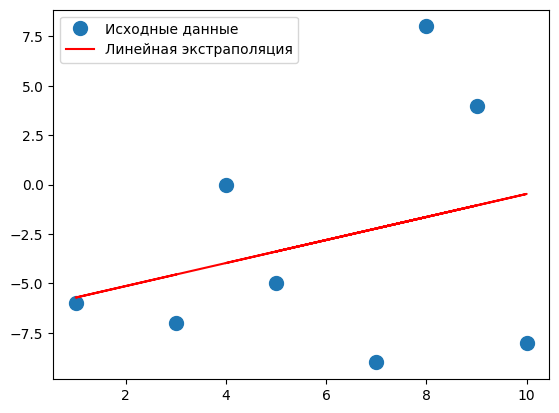

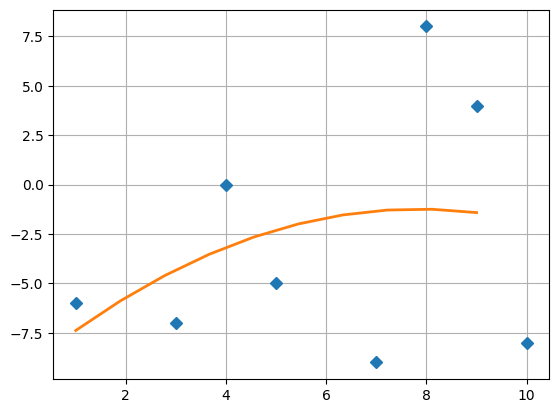

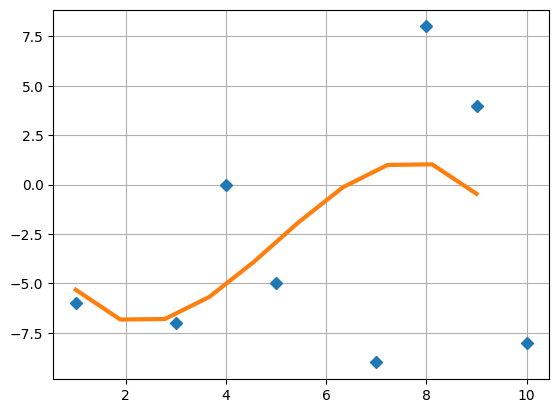

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([4,9,5,10,7,8,1,3])
y = np.array([0,4,-5,-8,-9,8,-6,-7])

A = np.vstack([x, np.ones(len(x))]).T

m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

plt.plot(x, y, 'o', label = 'Исходные данные', markersize = 10)
plt.plot(x, m*x + c, 'r', label = 'Линейная экстраполяция')
plt.legend()
plt.show()


m = np.vstack((x ** 2, x, np.ones(8))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = np.linspace(1, 9, 10)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw = 2)
plt.grid()
plt.show()

m = np.vstack((x ** 3, x ** 2, x, np.ones(8))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = np.linspace(1, 9, 10)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw = 3)
plt.grid()
plt.show()


1.1.5


Линейная модель:
Оптимальные параметры: [-4.37078967  1.3899275 ]
Линейное отклонение: 5.061204483560456
Квадратичное отклонение: 10796.508870568892


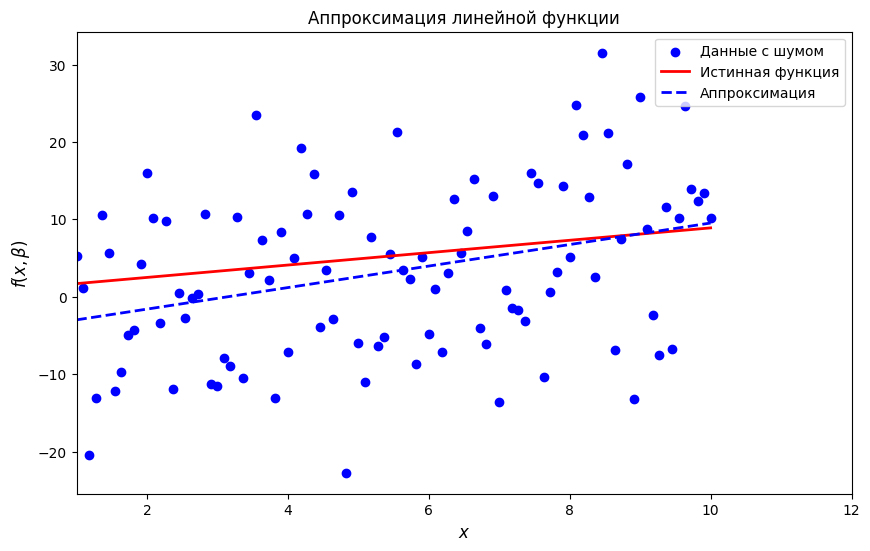


Квадратичная модель:
Оптимальные параметры: [1.18331777 1.52132999 0.87296775]
Линейное отклонение: 150.13573688757145
Квадратичное отклонение: 113540.20378256723


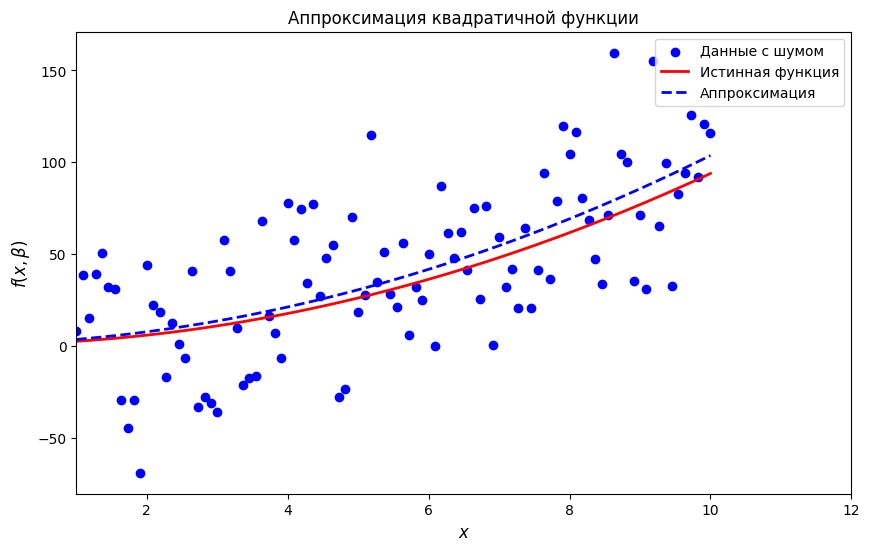

In [6]:
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

# Задача 1: Линейная функция
beta = (0.9, 0.8)

def f1(x, b0, b1):
    return b0 + x * b1

xdata = np.linspace(1, 10, 100)
y = f1(xdata, *beta)
ydata = y + 10 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f1, xdata, ydata)

# Линейное отклонение и квадратичное отклонение
lin_dev = sum(beta_cov[0])
residuals = ydata - f1(xdata, *beta_opt)
quad_dev = sum(residuals ** 2)

print("Линейная модель:")
print("Оптимальные параметры:", beta_opt)
print("Линейное отклонение:", lin_dev)
print("Квадратичное отклонение:", quad_dev)

# Построение графика
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(xdata, ydata, color='blue', label='Данные с шумом')
ax.plot(xdata, y, 'r', lw=2, label='Истинная функция')
ax.plot(xdata, f1(xdata, *beta_opt), 'b--', lw=2, label='Аппроксимация')
ax.set_xlim(1, 12)
ax.set_xlabel(r"$x$", fontsize=12)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=12)
ax.legend()
ax.set_title("Аппроксимация линейной функции")
plt.show()

# Задача 2: Квадратичная функция
beta = (0.9, 0.8, 0.85)

def f2(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2

y = f2(xdata, *beta)
ydata = y + 30 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f2, xdata, ydata)

# Линейное отклонение и квадратичное отклонение
lin_dev = sum(beta_cov[0])
residuals = ydata - f2(xdata, *beta_opt)
quad_dev = sum(residuals ** 2)

print("\nКвадратичная модель:")
print("Оптимальные параметры:", beta_opt)
print("Линейное отклонение:", lin_dev)
print("Квадратичное отклонение:", quad_dev)

# Построение графика
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(xdata, ydata, color='blue', label='Данные с шумом')
ax.plot(xdata, y, 'r', lw=2, label='Истинная функция')
ax.plot(xdata, f2(xdata, *beta_opt), 'b--', lw=2, label='Аппроксимация')
ax.set_xlim(1, 12)
ax.set_xlabel(r"$x$", fontsize=12)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=12)
ax.legend()
ax.set_title("Аппроксимация квадратичной функции")
plt.show()


1.2.2

,Actual,Predicted
0,93,98.020097
1,22,35.381443
2,43,27.029623
3,20,31.205533


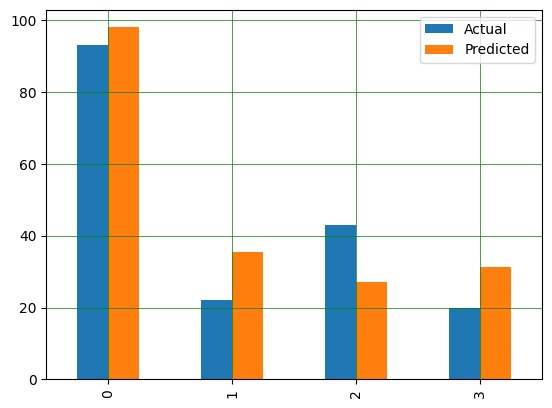

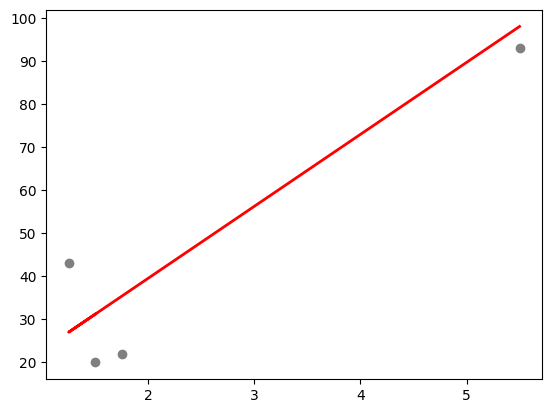

Коэффициенты линии регрессии:
6.150071773456858
[16.70364087]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'

dataframe = pd.read_csv(url)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.20
)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

#сравним фактические значения с прогнозируемыми
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
display(df)

#визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#построим линию регрессии с тестовыми данными
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

print('Коэффициенты линии регрессии:')
print(regressor.intercept_)
print(regressor.coef_)

1.3.3

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

url1 = 'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
url2 = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'

dataset1 = pd.read_csv(url1)
dataset2 = pd.read_csv(url2)

X_train1, X_test1, y_train1, y_test1 = train_test_split(dataset1.iloc[:, :-1],
                                                        dataset1.iloc[:, -1],
                                                        test_size=0.2,
                                                        random_state=0)

X_train2, X_test2, y_train2, y_test2 = train_test_split(dataset2.iloc[:, :-1],
                                                        dataset2.iloc[:, -1],
                                                        test_size=0.2,
                                                        random_state=0)

regressor1 = LinearRegression()
regressor1.fit(X_train1, y_train1)

regressor2 = LinearRegression()
regressor2.fit(X_train2, y_train2)

y_pred1 = regressor1.predict(X_test1)
df1 = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1})
display(df1)

y_pred2 = regressor2.predict(X_test2)
df2 = pd.DataFrame({'Actual': y_test2, 'Predicted': y_pred2})
display(df2)

print('Mean Squared Error first csv: ', metrics.mean_squared_error(y_test1, y_pred1))
print('Mean Squared Error second csv: ', metrics.mean_squared_error(y_test2, y_pred2))


,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


,Actual,Predicted
1109,6,5.782930
1032,5,5.036193
1002,7,6.596989
487,6,5.339126
979,5,5.939529
...,...,...
794,6,6.559757
813,4,6.017576
1322,5,6.251291
704,4,5.163926


Mean Squared Error first csv:  4666.344787588369
Mean Squared Error second csv:  0.3844711978201248


<p>1.3.4

<p>Вариант №3.<br>
x = [3.0, 3.2, 3.4, 3.6, 3.8, 4.0]<br>
y = [2.0, 3.0, 3.0, 3.0, 2.0, 4.0]</p>

[[3.  1. ]
 [3.2 1. ]
 [3.4 1. ]
 [3.6 1. ]
 [3.8 1. ]
 [4.  1. ]]
0.285714285714284 2.000000000000006


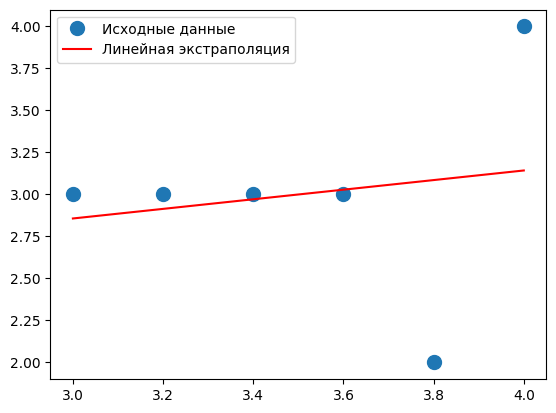

[  2.67857143 -18.46428571  34.5       ]


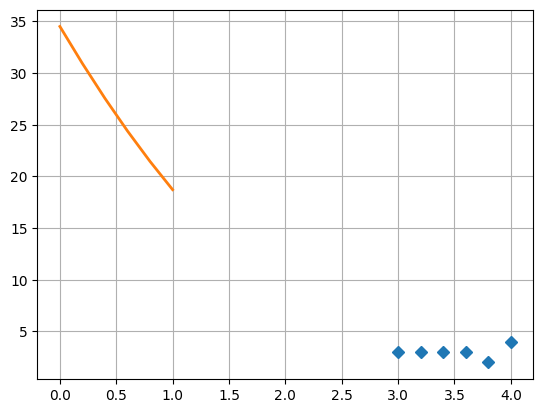

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([3.0, 3.2, 3.4, 3.6, 3.8, 4.0])
y = np.array([3.0, 3.0, 3.0, 3.0, 2.0, 4.0])

A = np.vstack([x, np.ones(len(x))]).T
print(A)

m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

plt.plot(x, y, 'o', label = 'Исходные данные', markersize = 10)
plt.plot(x, m*x + c, 'r', label = 'Линейная экстраполяция')
plt.legend()
plt.show()

m = np.vstack((x ** 2, x, np.ones(6))).T

s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = np.linspace(0, 1, 6)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw = 2)
plt.grid()
print(s)